In [127]:
import pandas as pd
import matplotlib.pyplot as mp

In [128]:
path_root = "./statistics/"

versions = ["cpu-dummy","redux","struct","coalesced", "grid", "dynamic", "grid_linearized"]
_INDEX_     = "NUM OF CORES"
_EXEC_TIME_ = "EXECUTION TIME"

In [129]:
%ls ./statistics

coalesced2-aws.csv         gpu_redux_PC-NIC.csv     struct3-aws.csv
coalesced-aws.csv          grid-aws.csv             struct4-aws.csv
cpu-dummy2-aws.csv         grid_linearized-aws.csv  struct-aws.csv
cpu-dummy-aws.csv          local/                   struct-opt-aws.csv
cpu-PC-NIC.csv             normal/                  test.csv
cpu_times_fixed_num_4.csv  redux-aws.csv
dynamic-aws.csv            struct2-aws.csv


In [130]:
#Load csv data into a panda array
def load_statistic(path):
    path = path_root + path + "-aws.csv"
    print("Loading: " + path)
    x = pd.read_csv(path)
    #x = x.set_index(_INDEX_)
    return x

In [131]:
#Load all files with name contained in versions eg: ["redux","struct"]
def load_all_statistics(versions):
    res = {}
    for v in versions:
        res[v] = load_statistic(v)
    return res

In [132]:
#Merge all statistics in a single dataframe (mantain only execution times)
def merge_statistics(statistics):
    merged = load_statistic("redux")
    for s in statistics:
        merged[s] = statistics[s][_EXEC_TIME_]
    merged = merged[["NUM OF CORES"] + versions]
    return merged

In [133]:
#Can plot versions comparisons by passing an array of versions names eg ["redux","struct"]
def plot_versions(data,versions_to_plot,fName="ciao"):
    data.plot(x=_INDEX_, y=versions_to_plot,kind="line", figsize=(10, 10),grid=True).get_figure().savefig(fName)
    #x = x.style.use('seaborn-whitegrid')
    # display plot
    mp.show()

In [134]:
def calculate_speedup(data,versions,reference_version="cpu-dummy"):
    df = pd.DataFrame(data)
    for v in versions:
        df["Speedup-"+v] = df[reference_version] / df[v]
        
    df = df.drop(["Speedup-"+reference_version],axis=1)
    return df

In [135]:
statistics = load_all_statistics(versions)
merged = merge_statistics(statistics)
speedups = calculate_speedup(merged,versions,"cpu-dummy")

Loading: ./statistics/cpu-dummy-aws.csv
Loading: ./statistics/redux-aws.csv
Loading: ./statistics/struct-aws.csv
Loading: ./statistics/coalesced-aws.csv
Loading: ./statistics/grid-aws.csv
Loading: ./statistics/dynamic-aws.csv
Loading: ./statistics/grid_linearized-aws.csv
Loading: ./statistics/redux-aws.csv


In [136]:
merged

,NUM OF CORES,cpu-dummy,redux,struct,coalesced,grid,dynamic,grid_linearized,Speedup-cpu-dummy,Speedup-redux,Speedup-struct,Speedup-coalesced,Speedup-grid,Speedup-dynamic,Speedup-grid_linearized
0,16,1.607047,0.425617,0.466114,0.319937,11.240362,13.566248,67.032275,1.0,3.775805,3.447755,5.023010,0.142971,0.118459,0.023974
1,25,3.889239,0.463464,0.524589,0.335340,18.634061,22.157072,72.734515,1.0,8.391674,7.413878,11.597897,0.208717,0.175530,0.053472
2,36,7.573095,0.667788,0.665717,0.386682,28.751568,33.135449,95.604844,1.0,11.340567,11.375849,19.584824,0.263398,0.228550,0.079212
3,49,14.063768,1.018746,0.976122,0.474588,44.307484,49.936433,111.056761,1.0,13.804978,14.407799,29.633641,0.317413,0.281633,0.126636
4,64,23.487239,1.670904,1.446056,0.598059,67.982940,74.093524,129.864715,1.0,14.056604,16.242276,39.272433,0.345487,0.316994,0.180859
5,81,37.771901,2.595702,2.136893,0.788512,95.758251,102.884532,157.788713,1.0,14.551710,17.676084,47.902761,0.394451,0.367129,0.239383
6,100,56.842011,3.870425,3.029770,1.052209,127.036412,135.120542,191.690726,1.0,14.686245,18.761164,54.021603,0.447447,0.420676,0.296530
7,121,83.592402,5.647244,4.295276,1.421808,160.872637,170.218711,202.775803,1.0,14.802336,19.461474,58.793041,0.519619,0.491088,0.412241
8,144,117.360463,7.838579,5.923920,1.899554,198.801068,209.539261,239.839440,1.0,14.972161,19.811285,61.783167,0.590341,0.560088,0.489329
9,169,162.270304,10.899327,8.053699,2.483355,241.214450,253.227884,283.668605,1.0,14.888103,20.148543,65.343175,0.672722,0.640807,0.572042


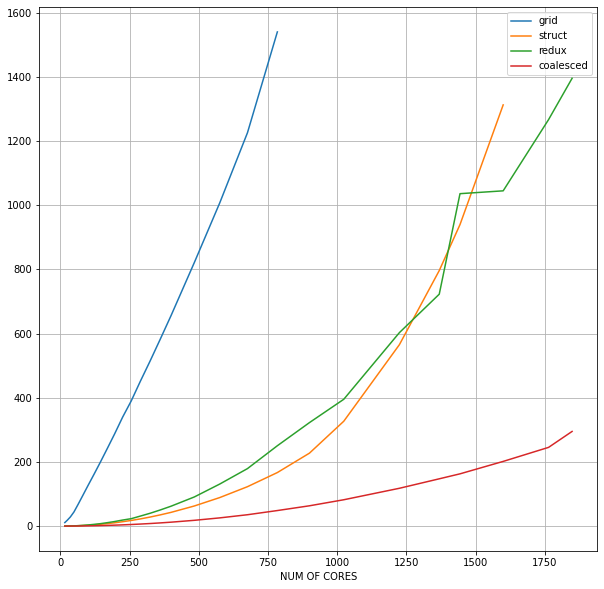

In [137]:
plot_versions(merged,["grid","struct","redux","coalesced"],fName="aaa.svg") #Can plot versions comparisons by passing an array of versions names eg ["redux","struct"]

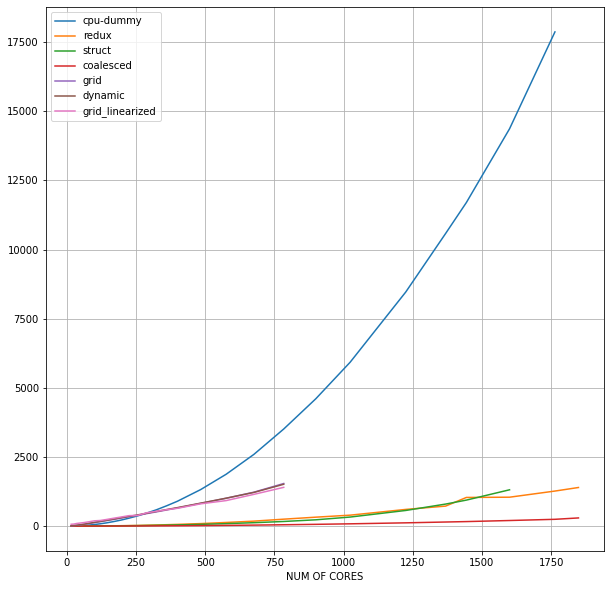

In [138]:
plot_versions(merged,versions)

In [139]:
speedups

,NUM OF CORES,cpu-dummy,redux,struct,coalesced,grid,dynamic,grid_linearized,Speedup-redux,Speedup-struct,Speedup-coalesced,Speedup-grid,Speedup-dynamic,Speedup-grid_linearized
0,16,1.607047,0.425617,0.466114,0.319937,11.240362,13.566248,67.032275,3.775805,3.447755,5.023010,0.142971,0.118459,0.023974
1,25,3.889239,0.463464,0.524589,0.335340,18.634061,22.157072,72.734515,8.391674,7.413878,11.597897,0.208717,0.175530,0.053472
2,36,7.573095,0.667788,0.665717,0.386682,28.751568,33.135449,95.604844,11.340567,11.375849,19.584824,0.263398,0.228550,0.079212
3,49,14.063768,1.018746,0.976122,0.474588,44.307484,49.936433,111.056761,13.804978,14.407799,29.633641,0.317413,0.281633,0.126636
4,64,23.487239,1.670904,1.446056,0.598059,67.982940,74.093524,129.864715,14.056604,16.242276,39.272433,0.345487,0.316994,0.180859
5,81,37.771901,2.595702,2.136893,0.788512,95.758251,102.884532,157.788713,14.551710,17.676084,47.902761,0.394451,0.367129,0.239383
6,100,56.842011,3.870425,3.029770,1.052209,127.036412,135.120542,191.690726,14.686245,18.761164,54.021603,0.447447,0.420676,0.296530
7,121,83.592402,5.647244,4.295276,1.421808,160.872637,170.218711,202.775803,14.802336,19.461474,58.793041,0.519619,0.491088,0.412241
8,144,117.360463,7.838579,5.923920,1.899554,198.801068,209.539261,239.839440,14.972161,19.811285,61.783167,0.590341,0.560088,0.489329
9,169,162.270304,10.899327,8.053699,2.483355,241.214450,253.227884,283.668605,14.888103,20.148543,65.343175,0.672722,0.640807,0.572042


In [140]:
merged.to_csv("result.csv")

In [141]:
data = pd.read_csv("result.csv")
data

,Unnamed: 0,NUM OF CORES,cpu-dummy,redux,struct,coalesced,grid,dynamic,grid_linearized,Speedup-cpu-dummy,Speedup-redux,Speedup-struct,Speedup-coalesced,Speedup-grid,Speedup-dynamic,Speedup-grid_linearized
0,0,16,1.607047,0.425617,0.466114,0.319937,11.240362,13.566248,67.032275,1.0,3.775805,3.447755,5.023010,0.142971,0.118459,0.023974
1,1,25,3.889239,0.463464,0.524589,0.335340,18.634061,22.157072,72.734515,1.0,8.391674,7.413878,11.597897,0.208717,0.175530,0.053472
2,2,36,7.573095,0.667788,0.665717,0.386682,28.751568,33.135449,95.604844,1.0,11.340567,11.375849,19.584824,0.263398,0.228550,0.079212
3,3,49,14.063768,1.018746,0.976122,0.474588,44.307484,49.936433,111.056761,1.0,13.804978,14.407799,29.633641,0.317413,0.281633,0.126636
4,4,64,23.487239,1.670904,1.446056,0.598059,67.982940,74.093524,129.864715,1.0,14.056604,16.242276,39.272433,0.345487,0.316994,0.180859
5,5,81,37.771901,2.595702,2.136893,0.788512,95.758251,102.884532,157.788713,1.0,14.551710,17.676084,47.902761,0.394451,0.367129,0.239383
6,6,100,56.842011,3.870425,3.029770,1.052209,127.036412,135.120542,191.690726,1.0,14.686245,18.761164,54.021603,0.447447,0.420676,0.296530
7,7,121,83.592402,5.647244,4.295276,1.421808,160.872637,170.218711,202.775803,1.0,14.802336,19.461474,58.793041,0.519619,0.491088,0.412241
8,8,144,117.360463,7.838579,5.923920,1.899554,198.801068,209.539261,239.839440,1.0,14.972161,19.811285,61.783167,0.590341,0.560088,0.489329
9,9,169,162.270304,10.899327,8.053699,2.483355,241.214450,253.227884,283.668605,1.0,14.888103,20.148543,65.343175,0.672722,0.640807,0.572042
